In [ ]:
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
restartkernel()

In [1]:
import analysis

In [2]:
dataset = "../Results/learningrate_0.01_epochs_550__graphconv_[10,10,]_dropout_0.0_attdim_10_attbias_3_fc_[]_model_gcn_cheby_maxdeg_3.protease_HCV_selector_8_ang_ratio_0_params_3.{}.csv"
#dataset = "../Results/learningrate_0.01_epochs_600__graphconv_[10,10,]_dropout_0.0_attdim_10_attbias_3_fc_[]_model_gcn_cheby_maxdeg_3.train_protease_HCV_selector_8_ang_ratio_0_params_3_test_protease_HCV_A171T_selector_8_ang_ratio_0_params_3.{}.csv"
att = dataset.format("attentions")
pred = dataset.format("predictions")
epoch = dataset.format("epoch")
silent_dir = "/mnt/c/Users/Owner/Documents/Code/Research_Scripts/PyRosetta/HCV"

In [3]:
analysis.classification_report(pred)

              precision    recall  f1-score   support

     CLEAVED      0.849     0.876     0.863       573
   UNCLEAVED      0.951     0.940     0.946      1478

    accuracy                          0.922      2051
   macro avg      0.900     0.908     0.904      2051
weighted avg      0.923     0.922     0.922      2051



Normalized confusion matrix
[[0.87609075 0.12390925]
 [0.06021651 0.93978349]]


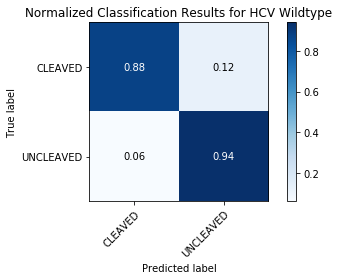

In [4]:
analysis.plot_confusion_matrix(pred, normalize = True, title = "Normalized Classification Results for HCV Wildtype")

In [5]:
analysis.attention_average(att, pred, silent_dir, 0)

PyRosetta-4 2019 [Rosetta PyRosetta4.conda.linux.CentOS.python36.Release 2019.19+release.5adc612fd9dee20f808a07e761610d95698b0f35 2019-05-10T09:04:00] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.conda.linux.CentOS.python36.Release r221 2019.19+release.5adc612f 5adc612fd9dee20f808a07e761610d95698b0f35 http://www.pyrosetta.org 2019-05-10T09:04:00
core.init: command: PyRosetta -ex1 -ex2aro -database /home/samuelstentz/.conda/envs/pyrosetta/lib/python3.6/site-packages/pyrosetta/database
core.init: 'RNG device' seed mode, using '/dev/urandom', seed=538056768 seed_offset=0 real_seed=538056768
core.init.random: RandomGenerator:init: Normal mode, seed=538056768 RG_type=mt19937
core.io.silent.SilentFileData: Reading all structures from /mnt/c/Users/Owner/Documents/Code/Research_Scripts/PyRosett

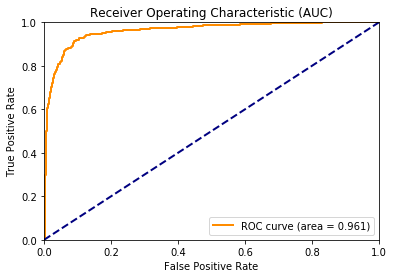

In [6]:
analysis.plot_auc(pred)

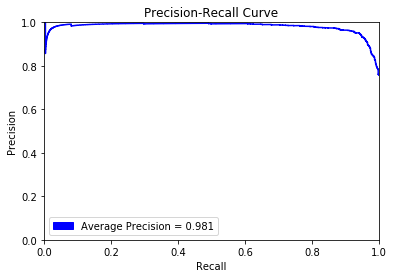

In [7]:
analysis.plot_aupr(pred)

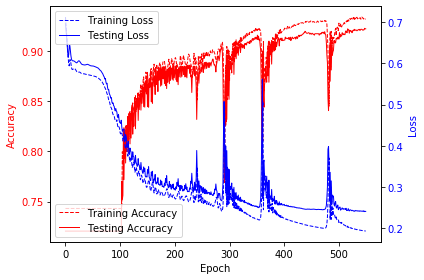

In [8]:
analysis.plot_progression(epoch)

In [9]:
analysis.attention_command(att, silent_dir, "ADVDARC.ASHL", 0)

PyRosetta-4 2019 [Rosetta PyRosetta4.conda.linux.CentOS.python36.Release 2019.19+release.5adc612fd9dee20f808a07e761610d95698b0f35 2019-05-10T09:04:00] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.conda.linux.CentOS.python36.Release r221 2019.19+release.5adc612f 5adc612fd9dee20f808a07e761610d95698b0f35 http://www.pyrosetta.org 2019-05-10T09:04:00
core.init: command: PyRosetta -ex1 -ex2aro -database /home/samuelstentz/.conda/envs/pyrosetta/lib/python3.6/site-packages/pyrosetta/database
core.init: 'RNG device' seed mode, using '/dev/urandom', seed=329657105 seed_offset=0 real_seed=329657105
core.init.random: RandomGenerator:init: Normal mode, seed=329657105 RG_type=mt19937
Silent file for ADVDARC.ASHL not found /mnt/c/Users/Owner/Documents/Code/Research_Scripts/PyRosetta/HCV/ADVD__C.ASHL/A

AttributeError: 'str' object has no attribute 'num_chains'

              precision    recall  f1-score   support

     CLEAVED      0.947     0.521     0.672      3644
   UNCLEAVED      0.844     0.989     0.911      9564

    accuracy                          0.860     13208
   macro avg      0.895     0.755     0.792     13208
weighted avg      0.873     0.860     0.845     13208

Normalized confusion matrix
[[0.52140505 0.47859495]
 [0.01118779 0.98881221]]


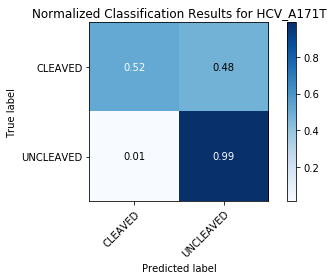

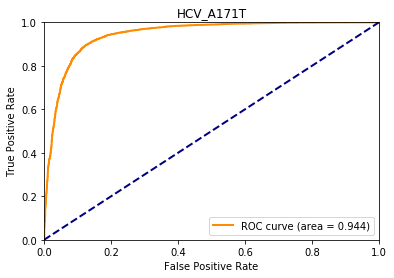

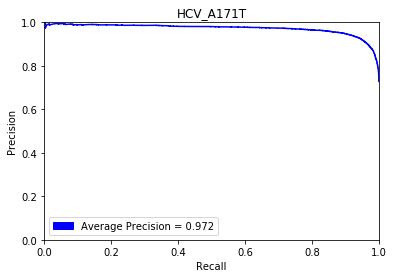

              precision    recall  f1-score   support

     CLEAVED      0.868     0.754     0.807      3135
   UNCLEAVED      0.813     0.903     0.855      3703

    accuracy                          0.835      6838
   macro avg      0.840     0.829     0.831      6838
weighted avg      0.838     0.835     0.833      6838

Normalized confusion matrix
[[0.75406699 0.24593301]
 [0.09694842 0.90305158]]


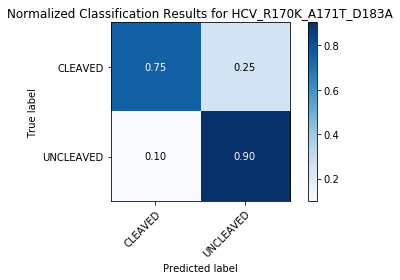

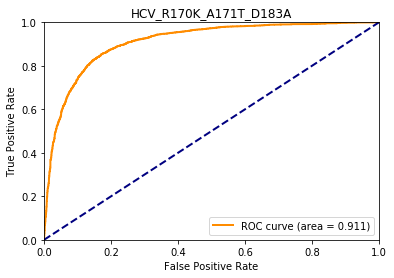

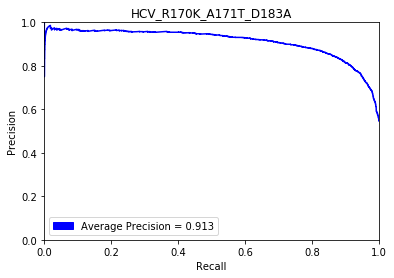

              precision    recall  f1-score   support

     CLEAVED      0.788     0.954     0.863      7514
   UNCLEAVED      0.875     0.557     0.681      4350

    accuracy                          0.809     11864
   macro avg      0.832     0.756     0.772     11864
weighted avg      0.820     0.809     0.796     11864

Normalized confusion matrix
[[0.95395262 0.04604738]
 [0.44252874 0.55747126]]


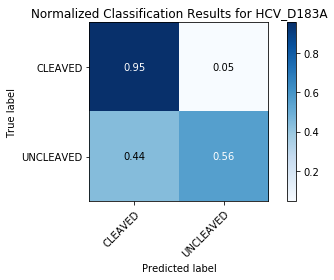

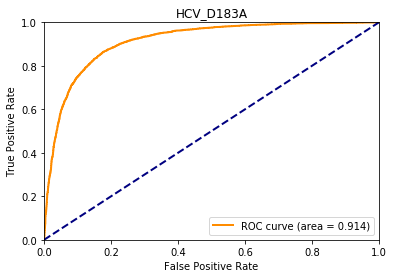

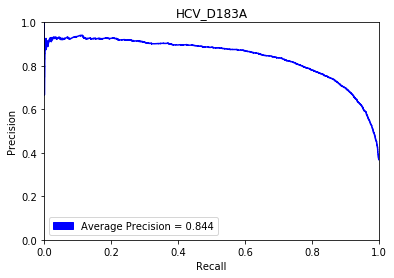

In [19]:
template = "../Results/learningrate_0.01_epochs_600__graphconv_[10,10,]_dropout_0.0_attdim_10_attbias_3_fc_[]_model_gcn_cheby_maxdeg_3.train_protease_HCV_selector_8_ang_ratio_0_params_3_test_protease_{}_selector_8_ang_ratio_0_params_3.{}.csv"
mutants = ["HCV_A171T", "HCV_R170K_A171T_D183A", "HCV_D183A"]

for m in mutants:
    try:
        pred = template.format(m, "predictions")
        epoch = template.format(m, "epoch")
        analysis.classification_report(pred)
        analysis.plot_confusion_matrix(pred, normalize = True, title = "Normalized Classification Results for {}".format(m))
        analysis.plot_auc(pred, m)
        analysis.plot_aupr(pred, m)
    except:
        pass

In [18]:
import pandas as pd
df = pd.read_csv("../Results/learningrate_0.01_epochs_600__graphconv_[10,10,]_dropout_0.0_attdim_10_attbias_3_fc_[]_model_gcn_cheby_maxdeg_3.train_protease_HCV_selector_8_ang_ratio_0_params_3_test_protease_HCV_D183A_selector_8_ang_ratio_0_params_3.predictions.csv")
print(df)
def conv(x):
    if x == "CLEAVED":
        return "UNCLEAVED"
    else:
        return "CLEAVED"

df["Prediction"] = df["Prediction"].map(lambda x: conv(x))

df.to_csv("../Results/learningrate_0.01_epochs_600__graphconv_[10,10,]_dropout_0.0_attdim_10_attbias_3_fc_[]_model_gcn_cheby_maxdeg_3.train_protease_HCV_selector_8_ang_ratio_0_params_3_test_protease_HCV_D183A_selector_8_ang_ratio_0_params_3.predictions.csv")

           Sequence      Label Prediction  Positive Class Logit  \
0      ADLMDDC.ASHL  UNCLEAVED  UNCLEAVED              1.122585   
1      ADLMDEC.ASHL  UNCLEAVED    CLEAVED              0.664709   
2      ADVFQPC.ASHL  UNCLEAVED    CLEAVED              0.053083   
3      AVEIEVC.ASHL  UNCLEAVED  UNCLEAVED              2.114209   
4      ANTWTTC.ASHL  UNCLEAVED  UNCLEAVED              6.307746   
5      AVEIEDC.ASHL  UNCLEAVED    CLEAVED              1.177137   
6      AVEIEEC.ASHL  UNCLEAVED    CLEAVED              1.226561   
7      ARMWIPC.ASHL  UNCLEAVED    CLEAVED              0.000000   
8      AHSLWTC.ASHL  UNCLEAVED  UNCLEAVED              1.678398   
9      APSNMAC.ASHL  UNCLEAVED  UNCLEAVED              3.828310   
10     AHQYHTC.ASHL  UNCLEAVED  UNCLEAVED              1.714386   
11     AISVIPC.ASHL  UNCLEAVED    CLEAVED              0.000000   
12     ATSFTQC.ASHL  UNCLEAVED  UNCLEAVED              2.950233   
13     AFSTAPC.ASHL  UNCLEAVED    CLEAVED              0.63253